### Bhagyashree Deshpande

# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

# 1) Movies Data

## Import Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
movie_data = pd.read_csv('my_movies.csv')
movie_data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


## Data Understanding

In [3]:
movie_data.shape

(10, 15)

In [4]:
movie_data.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [5]:
movie_data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [7]:
movie_data.describe(include = 'all')

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10,10,7,2,1,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
unique,4,5,4,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Gladiator,Patriot,Sixth Sense,Green Mile,LOTR2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,6,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,NaN,NaN,NaN,NaN,NaN,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
movie_data_1 = movie_data.iloc[:,5:16]

## Building Association Rules

### Model - 1 : Support = 0.1

In [9]:
movies_1 = apriori(movie_data_1, min_support = 0.1, use_colnames = True)
movies_1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [10]:
association_rules_1 = association_rules(movies_1, metric = 'lift', min_threshold = 0.8)
association_rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(LOTR1, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(LOTR1),"(Green Mile, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(LOTR1, Green Mile, Harry Potter1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [11]:
association_rules_1.sort_values('lift', ascending = False, inplace = True)
association_rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
134,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
103,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
210,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
165,"(LOTR1, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
207,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
64,(Sixth Sense),"(LOTR1, LOTR2)",0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


In [12]:
movie_name = 'Harry Potter1'
rules_1_harrypotter = (association_rules_1.lift>1) & (association_rules_1['antecedents'].astype(str).str.contains(movie_name))
association_rules_1.loc[rules_1_harrypotter,['antecedents','consequents','lift']]

,antecedents,consequents,lift
207,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",10.000000
195,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",10.000000
193,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",10.000000
151,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",10.000000
155,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",10.000000
...,...,...,...
190,"(Green Mile, Harry Potter1, LOTR2)",(Sixth Sense),1.666667
161,"(Green Mile, LOTR1, Harry Potter1)",(Sixth Sense),1.666667
79,"(Green Mile, Harry Potter1)",(Sixth Sense),1.666667
148,"(LOTR1, Harry Potter1, LOTR2)",(Sixth Sense),1.666667


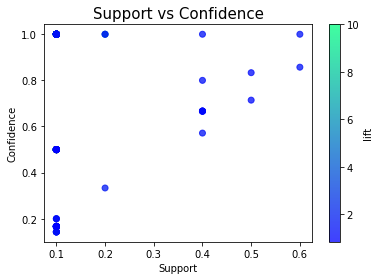

In [15]:
plt.scatter(association_rules_1['support'], association_rules_1['confidence'], c = association_rules_1['lift'], cmap = 'winter', alpha = 0.75)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence', size = 15)
cbar = plt.colorbar()
cbar.set_label('lift');

### Model - 2 : Support = 0.2

In [16]:
movies_2 = apriori(movie_data_1, min_support = 0.2, use_colnames = True)
movies_2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [17]:
association_rules_2 = association_rules(movies_1, metric = 'lift', min_threshold = 0.8)
association_rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(LOTR1, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(LOTR1),"(Green Mile, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(LOTR1, Green Mile, Harry Potter1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [18]:
association_rules_2.sort_values('lift', ascending = False, inplace = True)
association_rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
134,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
103,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
210,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
165,"(LOTR1, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
207,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
64,(Sixth Sense),"(LOTR1, LOTR2)",0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


In [19]:
movie_name = 'Harry Potter1'
rules_2_harrypotter = (association_rules_2.lift>1) & (association_rules_2['antecedents'].astype(str).str.contains(movie_name))
association_rules_2.loc[rules_2_harrypotter,['antecedents','consequents','lift']]

,antecedents,consequents,lift
207,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",10.000000
195,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",10.000000
193,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",10.000000
151,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",10.000000
155,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",10.000000
...,...,...,...
190,"(Green Mile, Harry Potter1, LOTR2)",(Sixth Sense),1.666667
161,"(Green Mile, LOTR1, Harry Potter1)",(Sixth Sense),1.666667
79,"(Green Mile, Harry Potter1)",(Sixth Sense),1.666667
148,"(LOTR1, Harry Potter1, LOTR2)",(Sixth Sense),1.666667


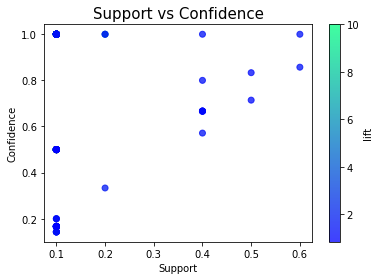

In [20]:
plt.scatter(association_rules_2['support'], association_rules_2['confidence'], c = association_rules_2['lift'], cmap = 'winter', alpha = 0.75)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence', size = 15)
cbar = plt.colorbar()
cbar.set_label('lift');

### Model - 3 : Support = 0.05

In [21]:
movies_3 = apriori(movie_data_1, min_support = 0.05, use_colnames = True)
movies_3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [22]:
association_rules_3 = association_rules(movies_1, metric = 'lift', min_threshold = 0.8)
association_rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(LOTR1, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(LOTR1),"(Green Mile, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(LOTR1, Green Mile, Harry Potter1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [23]:
association_rules_3.sort_values('lift', ascending = False, inplace = True)
association_rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
134,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
103,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
210,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
165,"(LOTR1, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
207,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
64,(Sixth Sense),"(LOTR1, LOTR2)",0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


In [24]:
movie_name = 'Harry Potter1'
rules_3_harrypotter = (association_rules_3.lift>1) & (association_rules_3['antecedents'].astype(str).str.contains(movie_name))
association_rules_3.loc[rules_3_harrypotter,['antecedents','consequents','lift']]

,antecedents,consequents,lift
207,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",10.000000
195,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",10.000000
193,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",10.000000
151,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",10.000000
155,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",10.000000
...,...,...,...
190,"(Green Mile, Harry Potter1, LOTR2)",(Sixth Sense),1.666667
161,"(Green Mile, LOTR1, Harry Potter1)",(Sixth Sense),1.666667
79,"(Green Mile, Harry Potter1)",(Sixth Sense),1.666667
148,"(LOTR1, Harry Potter1, LOTR2)",(Sixth Sense),1.666667


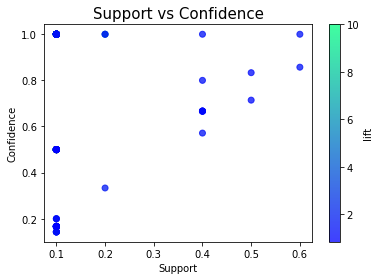

In [25]:
plt.scatter(association_rules_3['support'], association_rules_3['confidence'], c = association_rules_3['lift'], cmap = 'winter', alpha = 0.75)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence', size = 15)
cbar = plt.colorbar()
cbar.set_label('lift');

In [27]:
table = {'Association Rules' : pd.Series(['Association Rule 1', 'Association Rule 2', 'Association Rule 3']), 'Lift' : [max(association_rules_1.lift), max(association_rules_2.lift), max(association_rules_3.lift)]}
table = pd.DataFrame(table)
table

,Association Rules,Lift
0,Association Rule 1,10.0
1,Association Rule 2,10.0
2,Association Rule 3,10.0


## Conclusion

From the above table we observe that, for all the built association rules all the models lift metric is high and suggests the more associated movies.

## ========================================================================

# 2) Books Data

## Import Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

## Import Data

In [2]:
book_data = pd.read_csv('book.csv')
book_data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## Data Understanding

In [3]:
book_data.shape

(2000, 11)

In [4]:
book_data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [5]:
book_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
book_data.describe(include = 'all')

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building Association Rules

### Model - 1 : Support = 0.1

In [9]:
book_sets_1 = apriori(book_data, min_support = 0.1, use_colnames = True)
book_sets_1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [10]:
association_rules_1 = association_rules(book_sets_1, metric = 'lift', min_threshold = 0.8)
association_rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [11]:
association_rules_1.sort_values('lift', ascending = False, inplace = True)
association_rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [13]:
book_name = 'ChildBks'
rules_1_ChildBks = (association_rules_1.lift>1) & (association_rules_1['antecedents'].astype(str).str.contains(book_name))
association_rules_1.loc[rules_1_ChildBks, ['antecedents', 'consequents']]

,antecedents,consequents
77,"(ChildBks, ArtBks)",(GeogBks)
53,"(ChildBks, CookBks)",(RefBks)
76,"(ChildBks, GeogBks)",(ArtBks)
65,"(ChildBks, CookBks)",(GeogBks)
72,"(ChildBks, DoItYBks)",(GeogBks)
59,"(ChildBks, CookBks)",(ArtBks)
41,"(ChildBks, CookBks)",(YouthBks)
47,"(ChildBks, CookBks)",(DoItYBks)
70,"(ChildBks, GeogBks)",(DoItYBks)
55,(ChildBks),"(CookBks, RefBks)"


In [14]:
book_name = 'CookBks'
rules_1_CookBks = (association_rules_1.lift>1) & (association_rules_1['antecedents'].astype(str).str.contains(book_name))
association_rules_1.loc[rules_1_CookBks, ['antecedents', 'consequents']]

,antecedents,consequents
28,(CookBks),(ItalCook)
82,"(CookBks, DoItYBks)",(ArtBks)
95,"(CookBks, ArtBks)",(GeogBks)
94,"(CookBks, GeogBks)",(ArtBks)
53,"(ChildBks, CookBks)",(RefBks)
83,"(CookBks, ArtBks)",(DoItYBks)
65,"(ChildBks, CookBks)",(GeogBks)
90,"(CookBks, DoItYBks)",(GeogBks)
59,"(ChildBks, CookBks)",(ArtBks)
41,"(ChildBks, CookBks)",(YouthBks)


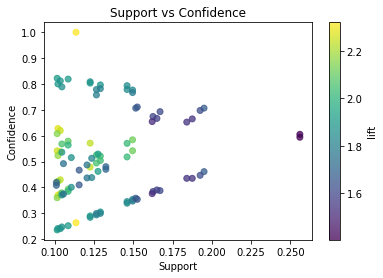

In [15]:
plt.scatter(association_rules_1['support'], association_rules_1['confidence'], c = association_rules_1['lift'], cmap = 'viridis', alpha = 0.75)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
cbar = plt.colorbar()
cbar.set_label('lift');

### Model - 2 : Support = 0.15

In [16]:
book_sets_2 = apriori(book_data, min_support = 0.15, use_colnames = True)
book_sets_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [17]:
association_rules_2 = association_rules(book_sets_2, metric = 'lift', min_threshold = 0.8)
association_rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


In [18]:
association_rules_2.sort_values('lift', ascending = False, inplace = True)
association_rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


In [19]:
book_name = 'ChildBks'
rules_2_ChildBks = (association_rules_2.lift>1) & (association_rules_2['antecedents'].astype(str).str.contains(book_name))
association_rules_2.loc[rules_2_ChildBks, ['antecedents', 'consequents']]

,antecedents,consequents
10,(ChildBks),(GeogBks)
6,(ChildBks),(RefBks)
8,(ChildBks),(ArtBks)
0,(ChildBks),(YouthBks)
4,(ChildBks),(DoItYBks)
2,(ChildBks),(CookBks)


In [20]:
book_name = 'CookBks'
rules_2_CookBks = (association_rules_2.lift>1) & (association_rules_2['antecedents'].astype(str).str.contains(book_name))
association_rules_2.loc[rules_2_CookBks, ['antecedents', 'consequents']]

,antecedents,consequents
16,(CookBks),(RefBks)
20,(CookBks),(GeogBks)
18,(CookBks),(ArtBks)
14,(CookBks),(DoItYBks)
12,(CookBks),(YouthBks)
3,(CookBks),(ChildBks)


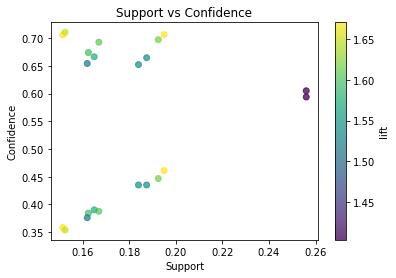

In [21]:
plt.scatter(association_rules_2['support'], association_rules_2['confidence'], c = association_rules_2['lift'], cmap = 'viridis', alpha = 0.75)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
cbar = plt.colorbar()
cbar.set_label('lift');

### Model - 3 : Support = 0.2

In [22]:
book_sets_3 = apriori(book_data, min_support = 0.2, use_colnames = True)
book_sets_3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [23]:
association_rules_3 = association_rules(book_sets_3, metric = 'lift', min_threshold = 0.8)
association_rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [25]:
book_name = 'ChildBks'
rules_3_ChildBks = (association_rules_3.lift>1) & (association_rules_3['antecedents'].astype(str).str.contains(book_name))
association_rules_3.loc[rules_3_ChildBks, ['antecedents', 'consequents']]

,antecedents,consequents
0,(ChildBks),(CookBks)


In [26]:
book_name = 'CookBks'
rules_3_CookBks = (association_rules_3.lift>1) & (association_rules_3['antecedents'].astype(str).str.contains(book_name))
association_rules_3.loc[rules_3_CookBks, ['antecedents', 'consequents']]

,antecedents,consequents
1,(CookBks),(ChildBks)


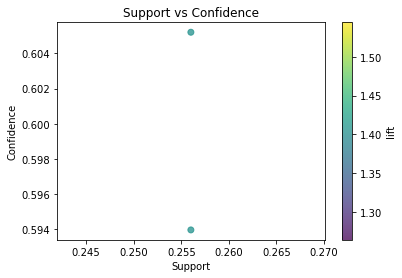

In [27]:
plt.scatter(association_rules_3['support'], association_rules_3['confidence'], c = association_rules_3['lift'], cmap = 'viridis', alpha = 0.75)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
cbar = plt.colorbar()
cbar.set_label('lift');

### Model - 4 : Support = 0.04

In [28]:
book_sets_4 = apriori(book_data, min_support = 0.04, use_colnames = True)
book_sets_4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(GeogBks, ChildBks, YouthBks, CookBks, RefBks)"
129,0.0465,"(GeogBks, ChildBks, YouthBks, CookBks, ArtBks)"
130,0.0450,"(GeogBks, ChildBks, CookBks, DoItYBks, RefBks)"
131,0.0535,"(GeogBks, ChildBks, CookBks, DoItYBks, ArtBks)"


In [29]:
association_rules_4 = association_rules(book_sets_4, metric = 'lift', min_threshold = 0.8)
association_rules_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1061,(GeogBks),"(ChildBks, ArtBks, RefBks, CookBks)",0.2760,0.0610,0.0405,0.146739,2.405560,0.023664,1.100484
1062,(ChildBks),"(CookBks, GeogBks, RefBks, ArtBks)",0.4230,0.0460,0.0405,0.095745,2.081406,0.021042,1.055012
1063,(CookBks),"(ChildBks, GeogBks, RefBks, ArtBks)",0.4310,0.0495,0.0405,0.093968,1.898334,0.019166,1.049079
1064,(RefBks),"(ChildBks, ArtBks, GeogBks, CookBks)",0.2145,0.0835,0.0405,0.188811,2.261212,0.022589,1.129823


In [30]:
association_rules_4.sort_values('lift', ascending = False, inplace = True)
association_rules_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
315,"(CookBks, ArtBks)",(ItalArt),0.1670,0.0485,0.0410,0.245509,5.062041,0.032900,1.261115
318,(ItalArt),"(CookBks, ArtBks)",0.0485,0.1670,0.0410,0.845361,5.062041,0.032900,5.386733
314,"(CookBks, ItalArt)",(ArtBks),0.0410,0.2410,0.0410,1.000000,4.149378,0.031119,inf
319,(ArtBks),"(CookBks, ItalArt)",0.2410,0.0410,0.0410,0.170124,4.149378,0.031119,1.155595
61,(ArtBks),(ItalArt),0.2410,0.0485,0.0485,0.201245,4.149378,0.036812,1.191229
...,...,...,...,...,...,...,...,...,...
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
14,(ChildBks),(Florence),0.4230,0.1085,0.0485,0.114657,1.056748,0.002605,1.006955
15,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
40,(CookBks),(Florence),0.4310,0.1085,0.0475,0.110209,1.015749,0.000737,1.001920


In [31]:
book_name = 'ChildBks'
rules_4_ChildBks = (association_rules_4.lift>1) & (association_rules_4['antecedents'].astype(str).str.contains(book_name))
association_rules_4.loc[rules_4_ChildBks, ['antecedents', 'consequents']]

,antecedents,consequents
594,"(ChildBks, CookBks)","(ItalCook, RefBks)"
410,"(ChildBks, ItalCook)","(CookBks, YouthBks)"
831,"(ChildBks, YouthBks, CookBks)","(DoItYBks, RefBks)"
634,"(ChildBks, ItalCook)","(CookBks, GeogBks)"
620,"(ChildBks, ItalCook)","(CookBks, ArtBks)"
...,...,...
8,(ChildBks),(ArtBks)
0,(ChildBks),(YouthBks)
4,(ChildBks),(DoItYBks)
2,(ChildBks),(CookBks)


In [32]:
book_name = 'CookBks'
rules_4_CookBks = (association_rules_4.lift>1) & (association_rules_4['antecedents'].astype(str).str.contains(book_name))
association_rules_4.loc[rules_4_CookBks, ['antecedents', 'consequents']]

,antecedents,consequents
315,"(CookBks, ArtBks)",(ItalArt)
314,"(CookBks, ItalArt)",(ArtBks)
594,"(ChildBks, CookBks)","(ItalCook, RefBks)"
415,"(CookBks, YouthBks)","(ChildBks, ItalCook)"
831,"(ChildBks, YouthBks, CookBks)","(DoItYBks, RefBks)"
...,...,...
32,(CookBks),(ArtBks)
28,(CookBks),(DoItYBks)
16,(CookBks),(YouthBks)
3,(CookBks),(ChildBks)


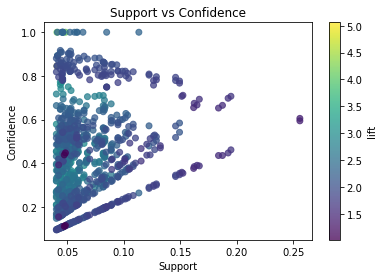

In [33]:
plt.scatter(association_rules_4['support'], association_rules_4['confidence'], c = association_rules_4['lift'], cmap = 'viridis', alpha = 0.75)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
cbar = plt.colorbar()
cbar.set_label('lift');

In [36]:
table = {'Association Rules' : pd.Series(['Association Rule 1', 'Association Rule 2', 'Association Rule 3', 'Association Rule 4']), 'Lift' : [max(association_rules_1.lift), max(association_rules_2.lift), max(association_rules_3.lift), max(association_rules_4.lift)]}
table = pd.DataFrame(table)
table

,Association Rules,Lift
0,Association Rule 1,2.320186
1,Association Rule 2,1.670264
2,Association Rule 3,1.404179
3,Association Rule 4,5.062041


## Conclusion

The above table depicts that, for all of the built association rules, model - 4 or the association rule - 4 has high lift metric and suggests the more associated books compared to other rules.